In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.optimizers import SGD
import PIL

### Building The Model

In [2]:
# Download the architecture of ResNet101 with ImageNet weights
base_model = ResNet101(include_top=False, weights='imagenet')
 
# Taking the output of the last convolution block in ResNet50
x = base_model.output
 
# Adding a Global Average Pooling layer
x = GlobalAveragePooling2D()(x)
 
# Adding a fully connected layer having 1024 neurons
x = Dense(1024, activation='relu')(x)
 
# Adding a fully connected layer having 2 neurons which will
# give the probability of image having either dog or cat
predictions = Dense(2, activation='softmax')(x)
 
# Model to be trained
model = Model(inputs=base_model.input, outputs=predictions)
 
# Training only top layers i.e. the layers which we have added in the end
for layer in base_model.layers:
    layer.trainable = False

In [3]:
# Compiling the model
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics = ['accuracy'])

### Dataset 1

In [4]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/train',
                                                               image_size=(227, 227),
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/val/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 425 files belonging to 2 classes.
Found 118 files belonging to 2 classes.
Found 203 files belonging to 2 classes.


In [5]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 80,
    validation_data = val_ds,
    verbose=1,
)

Epoch 1/80
14/14 [==============================] - 8s 553ms/step - loss: 0.7512 - accuracy: 0.5365 - val_loss: 0.7262 - val_accuracy: 0.4831
Epoch 2/80
14/14 [==============================] - 5s 391ms/step - loss: 0.6476 - accuracy: 0.6259 - val_loss: 0.7202 - val_accuracy: 0.5593
Epoch 3/80
14/14 [==============================] - 5s 392ms/step - loss: 0.5791 - accuracy: 0.6988 - val_loss: 0.7047 - val_accuracy: 0.6271
Epoch 4/80
14/14 [==============================] - 5s 392ms/step - loss: 0.5456 - accuracy: 0.7365 - val_loss: 0.6987 - val_accuracy: 0.6356
Epoch 5/80
14/14 [==============================] - 6s 393ms/step - loss: 0.5170 - accuracy: 0.7553 - val_loss: 0.6917 - val_accuracy: 0.6271
Epoch 6/80
14/14 [==============================] - 6s 393ms/step - loss: 0.4986 - accuracy: 0.7671 - val_loss: 0.6911 - val_accuracy: 0.6186
Epoch 7/80
14/14 [==============================] - 6s 394ms/step - loss: 0.4862 - accuracy: 0.7694 - val_loss: 0.6818 - val_accuracy: 0.5932
Epoch 

14/14 [==============================] - 6s 396ms/step - loss: 0.2293 - accuracy: 0.9341 - val_loss: 0.6109 - val_accuracy: 0.7034
Epoch 59/80
14/14 [==============================] - 6s 396ms/step - loss: 0.2258 - accuracy: 0.9459 - val_loss: 0.6032 - val_accuracy: 0.7034
Epoch 60/80
14/14 [==============================] - 6s 397ms/step - loss: 0.2245 - accuracy: 0.9482 - val_loss: 0.6049 - val_accuracy: 0.6949
Epoch 61/80
14/14 [==============================] - 6s 397ms/step - loss: 0.2221 - accuracy: 0.9435 - val_loss: 0.6082 - val_accuracy: 0.7034
Epoch 62/80
14/14 [==============================] - 6s 397ms/step - loss: 0.2203 - accuracy: 0.9341 - val_loss: 0.6104 - val_accuracy: 0.6949
Epoch 63/80
14/14 [==============================] - 6s 398ms/step - loss: 0.2206 - accuracy: 0.9435 - val_loss: 0.6068 - val_accuracy: 0.6949
Epoch 64/80
14/14 [==============================] - 6s 396ms/step - loss: 0.2183 - accuracy: 0.9341 - val_loss: 0.6107 - val_accuracy: 0.6864
Epoch 65/80

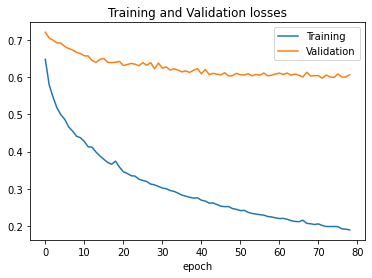

In [6]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("./Resnet_101_ds_1.png")

In [7]:
# We will try to train the last stage of ResNet50
for layer in base_model.layers[0:143]:
  layer.trainable = False
 
for layer in base_model.layers[143:]:
  layer.trainable = True

In [8]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 20,
    validation_data = val_ds,
    verbose=1,
)

model.save("./Resnet_101_dataset_1")

Epoch 1/20
14/14 [==============================] - 6s 402ms/step - loss: 0.1888 - accuracy: 0.9576 - val_loss: 0.5961 - val_accuracy: 0.7119
Epoch 2/20
14/14 [==============================] - 6s 409ms/step - loss: 0.1901 - accuracy: 0.9647 - val_loss: 0.6022 - val_accuracy: 0.7119
Epoch 3/20
14/14 [==============================] - 6s 399ms/step - loss: 0.1861 - accuracy: 0.9576 - val_loss: 0.5999 - val_accuracy: 0.7119
Epoch 4/20
14/14 [==============================] - 6s 404ms/step - loss: 0.1842 - accuracy: 0.9624 - val_loss: 0.6036 - val_accuracy: 0.7034
Epoch 5/20
14/14 [==============================] - 6s 398ms/step - loss: 0.1829 - accuracy: 0.9600 - val_loss: 0.6062 - val_accuracy: 0.7034
Epoch 6/20
14/14 [==============================] - 6s 404ms/step - loss: 0.1813 - accuracy: 0.9600 - val_loss: 0.5995 - val_accuracy: 0.7119
Epoch 7/20
14/14 [==============================] - 6s 403ms/step - loss: 0.1800 - accuracy: 0.9624 - val_loss: 0.5996 - val_accuracy: 0.7119
Epoch 

In [9]:
model.evaluate(test_ds)

7/7 [==============================] - 2s 295ms/step - loss: 0.5184 - accuracy: 0.7685


[0.5183602571487427, 0.7684729099273682]

### Dataset 2

In [10]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/train',
                                                               image_size=(227, 227),
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/validation/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 612 files belonging to 2 classes.
Found 99 files belonging to 2 classes.
Found 91 files belonging to 2 classes.


In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 80,
    validation_data = val_ds,
    verbose=1,
)

Epoch 1/80
20/20 [==============================] - 7s 364ms/step - loss: 0.3133 - accuracy: 0.8611 - val_loss: 0.2714 - val_accuracy: 0.8990
Epoch 2/80
20/20 [==============================] - 6s 301ms/step - loss: 0.3004 - accuracy: 0.8676 - val_loss: 0.2671 - val_accuracy: 0.8889
Epoch 3/80
20/20 [==============================] - 6s 301ms/step - loss: 0.2883 - accuracy: 0.8725 - val_loss: 0.2635 - val_accuracy: 0.8889
Epoch 4/80
20/20 [==============================] - 6s 301ms/step - loss: 0.2785 - accuracy: 0.8807 - val_loss: 0.2613 - val_accuracy: 0.8889
Epoch 5/80
20/20 [==============================] - 6s 301ms/step - loss: 0.2704 - accuracy: 0.8905 - val_loss: 0.2597 - val_accuracy: 0.8788
Epoch 6/80
20/20 [==============================] - 6s 301ms/step - loss: 0.2636 - accuracy: 0.8922 - val_loss: 0.2586 - val_accuracy: 0.8788
Epoch 7/80
20/20 [==============================] - 6s 301ms/step - loss: 0.2578 - accuracy: 0.8971 - val_loss: 0.2577 - val_accuracy: 0.8788
Epoch 

20/20 [==============================] - 6s 301ms/step - loss: 0.1581 - accuracy: 0.9559 - val_loss: 0.2403 - val_accuracy: 0.8889
Epoch 59/80
20/20 [==============================] - 6s 301ms/step - loss: 0.1571 - accuracy: 0.9559 - val_loss: 0.2401 - val_accuracy: 0.8889
Epoch 60/80
20/20 [==============================] - 6s 301ms/step - loss: 0.1560 - accuracy: 0.9559 - val_loss: 0.2398 - val_accuracy: 0.8889
Epoch 61/80
20/20 [==============================] - 6s 301ms/step - loss: 0.1550 - accuracy: 0.9575 - val_loss: 0.2395 - val_accuracy: 0.8889
Epoch 62/80
20/20 [==============================] - 6s 301ms/step - loss: 0.1539 - accuracy: 0.9608 - val_loss: 0.2393 - val_accuracy: 0.8889
Epoch 63/80
20/20 [==============================] - 6s 301ms/step - loss: 0.1529 - accuracy: 0.9608 - val_loss: 0.2390 - val_accuracy: 0.8889
Epoch 64/80
20/20 [==============================] - 6s 301ms/step - loss: 0.1519 - accuracy: 0.9608 - val_loss: 0.2388 - val_accuracy: 0.8889
Epoch 65/80

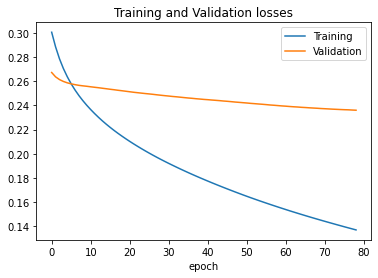

In [13]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("./Resnet_101_ds_2.png")

In [14]:
# We will try to train the last stage of ResNet50
for layer in base_model.layers[0:143]:
  layer.trainable = False
 
for layer in base_model.layers[143:]:
  layer.trainable = True

In [15]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 20,
    validation_data = val_ds,
    verbose=1,
)

model.save("./Resnet_101_dataset_2")

Epoch 1/20
20/20 [==============================] - 6s 305ms/step - loss: 0.1363 - accuracy: 0.9657 - val_loss: 0.2358 - val_accuracy: 0.8788
Epoch 2/20
20/20 [==============================] - 6s 303ms/step - loss: 0.1354 - accuracy: 0.9657 - val_loss: 0.2356 - val_accuracy: 0.8788
Epoch 3/20
20/20 [==============================] - 6s 302ms/step - loss: 0.1346 - accuracy: 0.9657 - val_loss: 0.2355 - val_accuracy: 0.8788
Epoch 4/20
20/20 [==============================] - 6s 303ms/step - loss: 0.1338 - accuracy: 0.9673 - val_loss: 0.2354 - val_accuracy: 0.8788
Epoch 5/20
20/20 [==============================] - 6s 302ms/step - loss: 0.1330 - accuracy: 0.9673 - val_loss: 0.2352 - val_accuracy: 0.8788
Epoch 6/20
20/20 [==============================] - 6s 301ms/step - loss: 0.1322 - accuracy: 0.9690 - val_loss: 0.2351 - val_accuracy: 0.8788
Epoch 7/20
20/20 [==============================] - 6s 301ms/step - loss: 0.1314 - accuracy: 0.9706 - val_loss: 0.2350 - val_accuracy: 0.8788
Epoch 

In [16]:
model.evaluate(test_ds)

3/3 [==============================] - 1s 388ms/step - loss: 0.2414 - accuracy: 0.9121


[0.24142414331436157, 0.9120879173278809]

### Dataset 3

In [17]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/train/',
                                                               image_size=(227, 227),
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/train/',
                                                             image_size=(227, 227),
                                                             validation_split=0.2,
                                                             subset="validation",
                                                             seed=123,
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 2233 files belonging to 2 classes.
Using 1787 files for training.
Found 2233 files belonging to 2 classes.
Using 446 files for validation.
Found 248 files belonging to 2 classes.


In [18]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 80,
    validation_data = val_ds,
    verbose=1,
)

Epoch 1/80
56/56 [==============================] - 26s 458ms/step - loss: 0.7604 - accuracy: 0.5876 - val_loss: 0.5236 - val_accuracy: 0.7309
Epoch 2/80
56/56 [==============================] - 25s 450ms/step - loss: 0.5123 - accuracy: 0.7443 - val_loss: 0.4742 - val_accuracy: 0.7646
Epoch 3/80
56/56 [==============================] - 25s 453ms/step - loss: 0.4545 - accuracy: 0.7745 - val_loss: 0.4144 - val_accuracy: 0.7982
Epoch 4/80
56/56 [==============================] - 25s 455ms/step - loss: 0.4205 - accuracy: 0.8008 - val_loss: 0.3858 - val_accuracy: 0.8296
Epoch 5/80
56/56 [==============================] - 25s 454ms/step - loss: 0.3965 - accuracy: 0.8125 - val_loss: 0.3708 - val_accuracy: 0.8408
Epoch 6/80
56/56 [==============================] - 26s 458ms/step - loss: 0.3798 - accuracy: 0.8232 - val_loss: 0.3571 - val_accuracy: 0.8453
Epoch 7/80
56/56 [==============================] - 25s 452ms/step - loss: 0.3640 - accuracy: 0.8344 - val_loss: 0.3517 - val_accuracy: 0.8543

Epoch 58/80
56/56 [==============================] - 25s 440ms/step - loss: 0.1750 - accuracy: 0.9418 - val_loss: 0.2271 - val_accuracy: 0.9058
Epoch 59/80
56/56 [==============================] - 25s 441ms/step - loss: 0.1717 - accuracy: 0.9435 - val_loss: 0.2259 - val_accuracy: 0.9058
Epoch 60/80
56/56 [==============================] - 25s 443ms/step - loss: 0.1720 - accuracy: 0.9429 - val_loss: 0.2213 - val_accuracy: 0.9148
Epoch 61/80
56/56 [==============================] - 25s 441ms/step - loss: 0.1711 - accuracy: 0.9373 - val_loss: 0.2252 - val_accuracy: 0.9058
Epoch 62/80
56/56 [==============================] - 25s 442ms/step - loss: 0.1675 - accuracy: 0.9468 - val_loss: 0.2204 - val_accuracy: 0.9081
Epoch 63/80
56/56 [==============================] - 25s 442ms/step - loss: 0.1679 - accuracy: 0.9474 - val_loss: 0.2199 - val_accuracy: 0.9081
Epoch 64/80
56/56 [==============================] - 25s 441ms/step - loss: 0.1656 - accuracy: 0.9452 - val_loss: 0.2181 - val_accuracy:

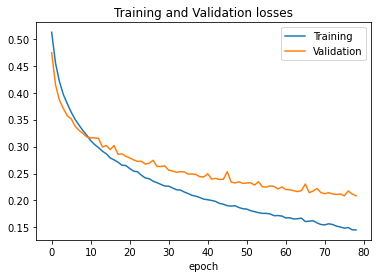

In [19]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("./Resnet_101_ds_3.png")

In [20]:
# We will try to train the last stage of ResNet50
for layer in base_model.layers[0:143]:
  layer.trainable = False
 
for layer in base_model.layers[143:]:
  layer.trainable = True

In [21]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 20,
    validation_data = val_ds,
    verbose=1,
)

model.save("./Resnet_101_dataset_3")

Epoch 1/20
56/56 [==============================] - 25s 442ms/step - loss: 0.1440 - accuracy: 0.9552 - val_loss: 0.2072 - val_accuracy: 0.9081
Epoch 2/20
56/56 [==============================] - 25s 442ms/step - loss: 0.1457 - accuracy: 0.9580 - val_loss: 0.2055 - val_accuracy: 0.9126
Epoch 3/20
56/56 [==============================] - 25s 441ms/step - loss: 0.1440 - accuracy: 0.9597 - val_loss: 0.2116 - val_accuracy: 0.9170
Epoch 4/20
56/56 [==============================] - 25s 443ms/step - loss: 0.1410 - accuracy: 0.9603 - val_loss: 0.2061 - val_accuracy: 0.9126
Epoch 5/20
56/56 [==============================] - 25s 443ms/step - loss: 0.1408 - accuracy: 0.9569 - val_loss: 0.2087 - val_accuracy: 0.9148
Epoch 6/20
56/56 [==============================] - 25s 442ms/step - loss: 0.1389 - accuracy: 0.9564 - val_loss: 0.2082 - val_accuracy: 0.9148
Epoch 7/20
56/56 [==============================] - 25s 442ms/step - loss: 0.1376 - accuracy: 0.9597 - val_loss: 0.2081 - val_accuracy: 0.9148

In [22]:
model.evaluate(test_ds)

8/8 [==============================] - 3s 319ms/step - loss: 0.2275 - accuracy: 0.9194


[0.22754022479057312, 0.9193548560142517]